In [98]:
import json
import numpy as np
import pandas as pd
import random

In [99]:
# 读取数据
loc_df = pd.read_csv("Location_Info - 2.csv", encoding='utf_8')
loc_df.head()

,ID,交通设施服务,住宿服务,公司企业,医疗保健服务,商务住宅,生活服务,科教文化服务,类型,购物服务,风景名胜,餐饮服务
0,1,85,94,1147,12,88,426,650,学校,472,0,0
1,2,0,45,1968,74,0,0,330,学校,147,5,43
2,3,165,14,130,23,53,131,511,学校,103,39,86
3,4,66,25,534,0,95,205,461,学校,437,14,128
4,5,255,88,0,43,111,281,437,学校,1679,17,184


In [100]:
# 只选取两个特征：商务住宅&餐饮服务
sub_loc_df = loc_df[["商务住宅", "餐饮服务"]]

<AxesSubplot:xlabel='餐饮服务', ylabel='商务住宅'>

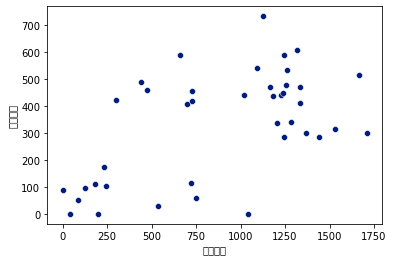

In [101]:
# 所有数据点在商务住宅&餐饮服务进行可视化
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',family='FangSong') # 此语句确保绘图中的中文可以正常显示
sns.scatterplot(x="餐饮服务", y="商务住宅", data=sub_loc_df)


In [109]:
# 标准化
from sklearn.preprocessing import StandardScaler
DB_df = sub_loc_df
DB_df_standardize = StandardScaler().fit_transform(DB_df)
DB_df_standardize = pd.DataFrame(data=DB_df_standardize, columns=list(DB_df.columns)) 
DB_df_standardize.head()

,商务住宅,餐饮服务
0,-1.248985,-1.799001
1,-1.696960,-1.711720
2,-1.427157,-1.624440
3,-1.213351,-1.539188
4,-1.131901,-1.425520


In [110]:
# 导入dbscan包
from sklearn.cluster import DBSCAN
DB_df = sub_loc_df
# 标准化
from sklearn.preprocessing import StandardScaler
DB_df_standardize = StandardScaler().fit_transform(DB_df)
DB_df_standardize = pd.DataFrame(data=DB_df_standardize, columns=list(DB_df.columns)) 
# 训练dbscan模型
DB =  DBSCAN(eps = 0.6,min_samples = 4)
DB.fit(DB_df_standardize)
# 将新标签组合到原来的数据框里面
DB_label = pd.DataFrame(DB.labels_, columns=['新标签'])
DB_df = pd.concat([DB_df, DB_label],axis=1)
DB_df.head()


,商务住宅,餐饮服务,新标签
0,88,0,0
1,0,43,0
2,53,86,0
3,95,128,0
4,111,184,0


<AxesSubplot:xlabel='餐饮服务', ylabel='商务住宅'>

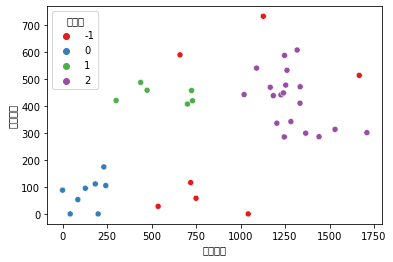

In [111]:
# 将聚类结果可视化
plt.rcParams['axes.unicode_minus'] = False
sns.set_palette("dark",5)
sns.scatterplot(x="餐饮服务", y="商务住宅", hue="新标签", data=DB_df, palette="Set1")

In [115]:
# final_df作为最后分析用的数据框
final_df = DB_df
# 聚类结果增加一列"交通设施服务"
final_df["交通设施服务"] = loc_df["交通设施服务"]
final_df["ID"] = loc_df["ID"]
final_df.head()


,商务住宅,餐饮服务,新标签,交通设施服务,ID
0,88,0,0,85,1
1,0,43,0,0,2
2,53,86,0,165,3
3,95,128,0,66,4
4,111,184,0,255,5


In [116]:
# summary_df用于对聚类的分析，下一步求平均值
summary_df = \
final_df[["商务住宅", "餐饮服务", "交通设施服务", "新标签"]].groupby("新标签") \
        .mean() \
        .round()
#求每一个类别中的数目
summary_df['数目'] = \
    final_df \
    .groupby("新标签") \
    .size()
# 展示
summary_df

,商务住宅,餐饮服务,交通设施服务,数目
新标签,,,,
-1,291.0,929.0,291.0,7
0,78.0,140.0,216.0,8
1,441.0,562.0,309.0,6
2,422.0,1287.0,453.0,19


In [117]:
# 每个聚类的典型样本 - 基于最大“交通设施服务”
exemplar = \
    final_df \
    .sort_values(['交通设施服务'], ascending = False) \
    .groupby('新标签') \
    .first() \
# 呈现
exemplar

,商务住宅,餐饮服务,交通设施服务,ID
新标签,,,,
-1,513,1667,567,39
0,174,232,619,7
1,419,730,517,17
2,540,1090,815,21
